# **Mekanika Statistik: Persamaan Ionisasi Saha (khusus Hidrogen)**

---

Mata Kuliah: **AS3105 Proses Astrofisika I**

Bab: **Persamaan Boltzmann & Saha**

Nama: **Sulthon Furqandhani Araska**

NIM: **10321013**

Tugas: [PR-4-ProAs-I-Sem-I-2023.pdf](https://cdn-edunex.itb.ac.id/PR-4-ProAs-I-Sem-I-2023.pdf)

<ipython-input-22-4c4965c123b4>:41: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log10(T), np.log10(n_s(0)/n_r(0)), label='n = 10⁵/m³')
<ipython-input-22-4c4965c123b4>:41: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(T), np.log10(n_s(0)/n_r(0)), label='n = 10⁵/m³')
<ipython-input-22-4c4965c123b4>:41: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(T), np.log10(n_s(0)/n_r(0)), label='n = 10⁵/m³')
<ipython-input-22-4c4965c123b4>:42: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log10(T), np.log10(n_s(1)/n_r(1)), label='n = 10⁹/m³')
<ipython-input-22-4c4965c123b4>:42: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(T), np.log10(n_s(1)/n_r(1)), label='n = 10⁹/m³')
<ipython-input-22-4c4965c123b4>:42: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(T), np.log10(n_s(1)/n_r(1)), label='n = 10⁹/m³')
<ipython-input-22-4c4965c123b4>:43: RuntimeWarning: invali

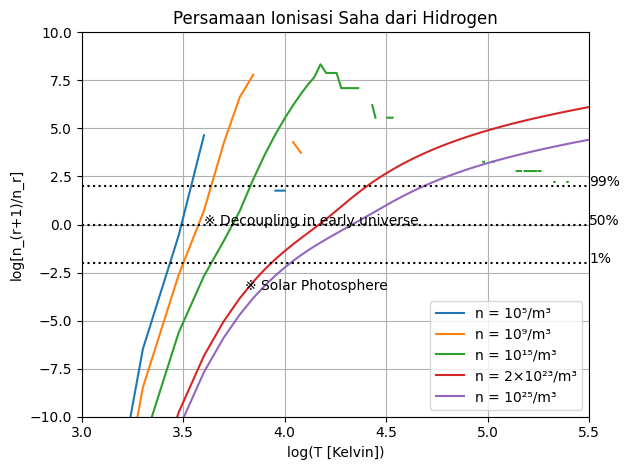

In [22]:
# @title ***Codelines***

# Impor libraries
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

# Konstanta matematika & fisika
π   = sc.pi   # Konstanta π
h   = sc.h    # Konstanta Planck
k   = sc.k    # Konstanta Boltzmann
m   = sc.m_e  # Massa elektron
χ   = sc.physical_constants['Rydberg constant times hc in J'][0]
g_e = 2       # Bobot statistik elektron

# Variabel bebas:
T = np.linspace(1e3, 10**6, 1000) # Temperatur
n = [1e5, 1e9, 1e15, 2e23, 1e25]  # Total elektron

# Aproksimasi fungsi partisi untuk atom hidorgen netral
def G_r(T):
  G_r = 0
  for n in range(1,10**10):       # Aproksimasi suku banyak
    g_n = 2*(n**2)                # Bobot statistik atom Hidrogen pada keadaan eksitasi-n
    ε_n = χ*(1 - n**-2)           # Energi eksitasi dari tingkat dasar
    G_r += g_n*np.exp(-ε_n/(k*T)) # Fungsi partisi pada keadaan netral
    return G_r
# Fungsi partisi untuk ion hidrogen (proton bebas)
G_s = 1

# Persamaan Saha
S = g_e*(G_s/G_r(T))*((np.sqrt(2*π*m*k*T)/h)**3)*np.exp(-χ/(k*T))   # S = n_(r+1)^2/n_r
def n_s(i):
  n_s = (np.sqrt(S**2 + 4*S*n[i]) - S)/2
  return n_s
def n_r(i):
  n_r = n[i] - n_s(i)
  return n_r

# Plot grafik kurva Saha
plt.plot(np.log10(T), np.log10(n_s(0)/n_r(0)), label='n = 10⁵/m³')
plt.plot(np.log10(T), np.log10(n_s(1)/n_r(1)), label='n = 10⁹/m³')
plt.plot(np.log10(T), np.log10(n_s(2)/n_r(2)), label='n = 10¹⁵/m³')
plt.plot(np.log10(T), np.log10(n_s(3)/n_r(3)), label='n = 2×10²³/m³')
plt.plot(np.log10(T), np.log10(n_s(4)/n_r(4)), label='n = 10²⁵/m³')

# Contoh kasus astrofisis:
plt.text(np.log10(6400), np.log10(4e-4), '※ Solar Photosphere')
plt.text(np.log10(4000), np.log10(1),    '※ Decoupling in early universe')

# Garis keterangan tambahan dalam plot
plt.text(5.5, np.log10(1/99), '1%')   # Garis horizontal 1%
plt.text(5.5, np.log10(50/50),'50%')  # Garis horizontal 50%
plt.text(5.5, np.log10(99/1), '99%')  # Garis horizontal 99%
plt.axhline(y=np.log10(1/99),  color='k', linestyle=':')  # Garis horizontal 1%
plt.axhline(y=np.log10(50/50), color='k', linestyle=':')  # Garis horizontal 50%
plt.axhline(y=np.log10(99/1),  color='k', linestyle=':')  # Garis horizontal 99%

# Miscellaneous
plt.title("Persamaan Ionisasi Saha dari Hidrogen")
plt.xlabel('log(T [Kelvin])')
plt.ylabel('log[n_(r+1)/n_r]')
plt.xlim(3.0, 5.5)
plt.ylim(-10, 10)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

*Disclaimer*:

Beberapa garis kurva Persamaan Saha tampak tidak "bersih" (ada garis-garis putus) karena tidak lagi valid ketika mencapai temperatur tertentu.